In [1]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import pandas as pd
import re
#from wordcloud import WordCloud
import contractions
import collections
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter


subreddit = 'conspiracy'
type_of_content = 'submissions'
column = 'title'
filename = f'./data/{subreddit}_{type_of_content}_filtered.csv'
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

dataframe = pd.read_csv(filename, compression='gzip')
dataframe.head()

,author,title,num_comments
0,ChildrensHealthDef,"New York Post Attacks RFK, Jr. as Sales of ‘Th...",1
1,Lotso_Packetloss,What good are NATO sanctions against Russia wh...,1
2,mr_clemFandango,Ukraine Crisis - What You're Not Being Told 20...,1
3,lh7884,Bill Gates: 'If every country does what Austra...,1
4,One2alwaysplay,What's really going on??,1


In [4]:
comments = dataframe[column]

preprocessed_comments = []

for comment in comments:
    comment = str(comment)
    comment = comment.lower()
    comment = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",comment)
    comment = " ".join(word for word in comment.split() if word not in stop)
    comment = " ".join(contractions.fix(word) for word in comment.split())
    comment = " ".join(word for word in comment.split() if word not in stop)

    comment = re.sub(r"[^0-9A-Za-z \t]","",comment)
    comment = tokenizer.tokenize(comment)
    comment = [lemmatizer.lemmatize(word, pos="v") for word in comment]
    preprocessed_comments.append(comment)


* https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb
* monkeylearn.com/blog/text_cleaning


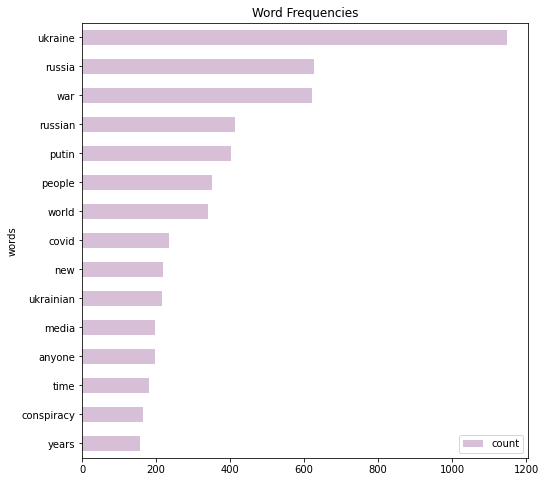

In [13]:
wordcloud_text = ''
frequency = []
textfile = open(f'./data/{subreddit}_{type_of_content}_wordlist.txt', "w")

for comment in preprocessed_comments:
    pos = nltk.pos_tag(comment)
    for word in pos:
        if word[1] in {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}:
            wordcloud_text = wordcloud_text + word[0] + ' '
            frequency.append(word[0])
            textfile.write(word[0] + "\n")

textfile.close()

'''wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis('off')
plt.imshow(wc)
plt.savefig(f'./images/{subreddit}_wordcloud.png')'''

word_frequency = collections.Counter(frequency)
word_frequency.most_common(15)
word_frequency = pd.DataFrame(word_frequency.most_common(15), columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
word_frequency.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color='thistle')
plt.title('Word Frequencies')
plt.savefig(f'./images/{subreddit}_wordfrequency.png')

In [7]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiments = []
for comment in comments:
    sentiment = sentiment_analyzer.polarity_scores(comment)
    if sentiment['compound'] >= 0.05:
        sentiments.append('positive')
    elif sentiment['compound'] <= -0.05:
        sentiments.append('negative')
    else :
        sentiments.append('neutral')

a = dict(Counter(sentiments))

 



NameError: name 'Counter' is not defined